## Strategies to Deal with Imbalanced Data

1. Over samplin
2. Under samplin
3. SMOT
4. Cost function with weight
5. Tunning Hyperparameter

In [178]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from plotnine import *

In [179]:
train_set = pd.read_csv("../../fraud_data/fraudTrain.csv").sample(frac=0.2, random_state=1234)
train_set.shape

(259335, 23)

In [180]:
train_set.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
883464,883464,2019-12-22 20:20:51,4155021259183870,"fraud_Schuppe, Nolan and Hoeger",shopping_pos,4.83,Renee,Parrish,F,174 Jennifer Meadow Apt. 467,...,34.7032,-98.9591,540,Research scientist (life sciences),1983-10-12,6988b6533fb672e329b8c6be12f4a37e,1356207651,35.132903,-99.262542,0
492941,492941,2019-08-03 13:37:42,2712209726293386,"fraud_Bahringer, Osinski and Block",food_dining,32.16,Jenna,Brooks,F,50872 Alex Plain Suite 088,...,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,ab169e816958116e7aa97d8ac05fe82c,1344001062,30.138940,-91.441901,0
1123627,1123627,2020-04-13 02:03:39,30199621383748,fraud_Kunze Inc,grocery_pos,191.49,Theresa,Powell,F,117 Natasha Vista Suite 936,...,33.4044,-96.2238,4090,Sub,1977-03-23,b4480d4836b8b8d212559b4e40f3134c,1365818619,33.929313,-96.991478,0
675332,675332,2019-10-14 16:41:04,3502088871723054,"fraud_McDermott, Osinski and Morar",home,87.62,Scott,Martin,M,31472 Cody Place Suite 740,...,39.0298,-77.0793,19054,Operations geologist,1976-09-08,0d08cbe9ab330f7d481855fbee1219e5,1350232864,38.813740,-76.926650,0
1224452,1224452,2020-05-26 10:54:14,3547560454237873,fraud_Denesik and Sons,shopping_pos,11.22,Jerry,Robinson,M,212 Mary Stream,...,44.5232,-86.2061,680,"Designer, jewellery",1966-12-21,3ea5e09eabb6a66debf8db0bcc12e482,1369565654,44.785342,-86.173245,0


In [181]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 259335 entries, 883464 to 327186
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             259335 non-null  int64  
 1   trans_date_trans_time  259335 non-null  object 
 2   cc_num                 259335 non-null  int64  
 3   merchant               259335 non-null  object 
 4   category               259335 non-null  object 
 5   amt                    259335 non-null  float64
 6   first                  259335 non-null  object 
 7   last                   259335 non-null  object 
 8   gender                 259335 non-null  object 
 9   street                 259335 non-null  object 
 10  city                   259335 non-null  object 
 11  state                  259335 non-null  object 
 12  zip                    259335 non-null  int64  
 13  lat                    259335 non-null  float64
 14  long                   259335 n

In [182]:
train_set['trans_date_trans_time'] = [str[:8]+'01' for str in train_set['trans_date_trans_time']]

In [183]:
train_set.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
883464,883464,2019-12-01,4155021259183870,"fraud_Schuppe, Nolan and Hoeger",shopping_pos,4.83,Renee,Parrish,F,174 Jennifer Meadow Apt. 467,...,34.7032,-98.9591,540,Research scientist (life sciences),1983-10-12,6988b6533fb672e329b8c6be12f4a37e,1356207651,35.132903,-99.262542,0
492941,492941,2019-08-01,2712209726293386,"fraud_Bahringer, Osinski and Block",food_dining,32.16,Jenna,Brooks,F,50872 Alex Plain Suite 088,...,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,ab169e816958116e7aa97d8ac05fe82c,1344001062,30.138940,-91.441901,0
1123627,1123627,2020-04-01,30199621383748,fraud_Kunze Inc,grocery_pos,191.49,Theresa,Powell,F,117 Natasha Vista Suite 936,...,33.4044,-96.2238,4090,Sub,1977-03-23,b4480d4836b8b8d212559b4e40f3134c,1365818619,33.929313,-96.991478,0
675332,675332,2019-10-01,3502088871723054,"fraud_McDermott, Osinski and Morar",home,87.62,Scott,Martin,M,31472 Cody Place Suite 740,...,39.0298,-77.0793,19054,Operations geologist,1976-09-08,0d08cbe9ab330f7d481855fbee1219e5,1350232864,38.813740,-76.926650,0
1224452,1224452,2020-05-01,3547560454237873,fraud_Denesik and Sons,shopping_pos,11.22,Jerry,Robinson,M,212 Mary Stream,...,44.5232,-86.2061,680,"Designer, jewellery",1966-12-21,3ea5e09eabb6a66debf8db0bcc12e482,1369565654,44.785342,-86.173245,0


In [184]:
train_set.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

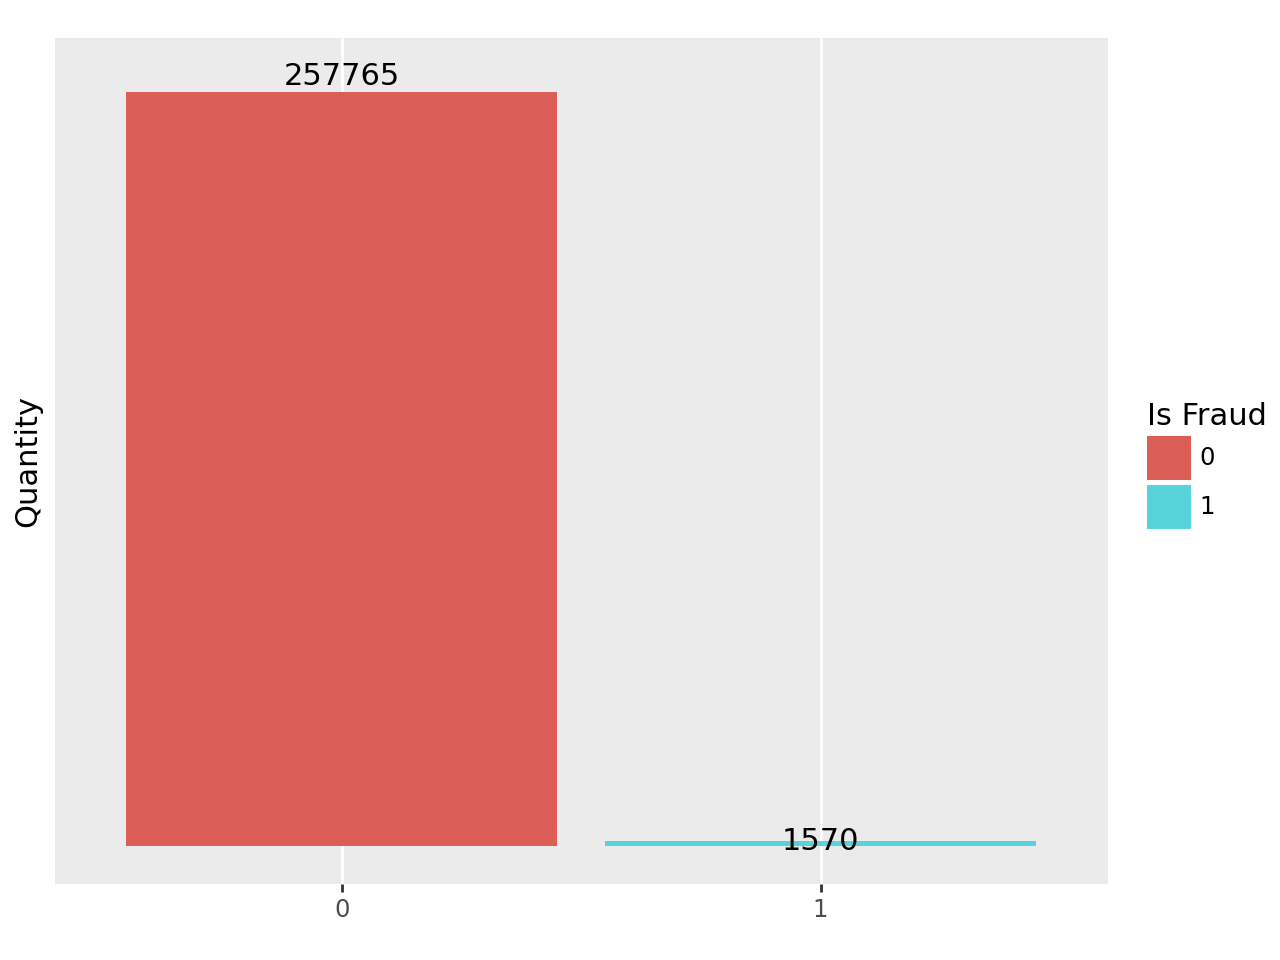

<Figure Size: (640 x 480)>

In [185]:
count_is_fraud = pd.DataFrame(train_set.groupby('is_fraud')['is_fraud'].aggregate(qty_n = 'count'))
count_is_fraud.index.name = "is_fraud"
count_is_fraud.reset_index(inplace=True)
count_is_fraud['is_fraud'] = count_is_fraud.is_fraud.astype('category')

(
    ggplot(data=count_is_fraud)+
    geom_col(aes(x='is_fraud', y='qty_n', fill='is_fraud'))+
    scale_y_continuous(
        name='Quantity',
        labels="",
        breaks=""
    )+
    geom_text(aes(x='is_fraud', y='qty_n', label='qty_n'), position=position_stack(vjust=1.02))+
    labs(x="", fill="Is Fraud")
)

In [186]:
train_set_final = train_set.drop(['Unnamed: 0', 'cc_num', 'first', 'last', 'street', 'city', 'state', 'zip', 'trans_num', 'merchant', 'unix_time', 'dob'], axis=1)

In [187]:
train_set_final.head()

,trans_date_trans_time,category,amt,gender,lat,long,city_pop,job,merch_lat,merch_long,is_fraud
883464,2019-12-01,shopping_pos,4.83,F,34.7032,-98.9591,540,Research scientist (life sciences),35.132903,-99.262542,0
492941,2019-08-01,food_dining,32.16,F,30.4066,-91.1468,378909,"Designer, furniture",30.138940,-91.441901,0
1123627,2020-04-01,grocery_pos,191.49,F,33.4044,-96.2238,4090,Sub,33.929313,-96.991478,0
675332,2019-10-01,home,87.62,M,39.0298,-77.0793,19054,Operations geologist,38.813740,-76.926650,0
1224452,2020-05-01,shopping_pos,11.22,M,44.5232,-86.2061,680,"Designer, jewellery",44.785342,-86.173245,0


It'll be used CatBoost for Classification in this notebook, since there is a lot of categorical values with countless categories.

In [188]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict, cross_val_score
from sklearn.metrics  import f1_score, recall_score, roc_auc_score, roc_curve, precision_recall_curve, precision_score, accuracy_score
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTENC

In [242]:
class CB:

    def __init__(self, model, train_x, train_y, validation_x, validation_y):

        self.model = model    
        self.train_x = train_x
        self.train_y = train_y
        self.validation_x = validation_x
        self.validation_y = validation_y
        self.predictions = self.predict()

    def predict(self):

        self.model.fit(self.train_x, self.train_y)
        predictions_inside = pd.DataFrame(self.model.predict(self.train_x))
        proba_inside = pd.DataFrame(self.model.predict_proba(self.train_x)[::, 1])
        predictions_outside = pd.DataFrame(self.model.predict(self.validation_x))
        proba_outside = pd.DataFrame(self.model.predict_proba(self.validation_x)[::, 1])

        predict_inside = pd.concat([predictions_inside, proba_inside], axis=1).set_axis(['predict_inside', 'proba_inside'], axis=1)
        predict_outside = pd.concat([predictions_outside, proba_outside], axis=1).set_axis(['predict_outside', 'proba_outside'], axis=1)

        return({'inside': predict_inside, 'outside': predict_outside})

    def scores(self):

        accuracy = accuracy_score(y_true=self.validation_y, y_pred=self.predictions['outside']['predict_outside'])
        precision = precision_score(y_true=self.validation_y, y_pred=self.predictions['outside']['predict_outside'])
        recall = recall_score(y_true=self.validation_y, y_pred=self.predictions['outside']['predict_outside'])
        f1 = f1_score(y_true=self.validation_y, y_pred=self.predictions['outside']['predict_outside'])
        roc_auc = roc_auc_score(y_true=self.validation_y, y_score=self.predictions['outside']['proba_outside'])

        all_scores = pd.DataFrame([accuracy, precision, recall, f1, roc_auc]).T.\
            rename(columns={0:'accuracy', 1:'precision', 2:'recall', 3:'f1', 4:'roc_auc'})
        
        return(all_scores)

    def score_curves(self):
    
        threshold_proba = self.predictions['outside']['proba_outside']
        precisions, recalls, _ = precision_recall_curve(y_true=self.validation_y, probas_pred=threshold_proba)
        fpr, tpr, _ = roc_curve(y_true=self.validation_y, y_score=threshold_proba)

        return({
            'PR': pd.concat([pd.DataFrame(precisions), pd.DataFrame(recalls)], axis=1).set_axis(['precision', 'recall'], axis=1),
            'ROC_AUC': pd.concat([pd.DataFrame(fpr), pd.DataFrame(tpr)], axis=1).set_axis(['fpr', 'tpr'], axis=1)
        })

In [243]:
features = train_set_final.drop(['is_fraud'], axis=1)
target = train_set_final['is_fraud']

In [244]:
cat_features = list(train_set_final.select_dtypes("object").columns.to_list())
cat_features_index = [train_set_final.columns.get_loc(col) for col in cat_features]

### CatBoost without any strategy

In [245]:
train_x, validation_x, train_y, validation_y = train_test_split(features, target, test_size=0.3, random_state=1234, stratify=target)

In [246]:
train_x.head()

,trans_date_trans_time,category,amt,gender,lat,long,city_pop,job,merch_lat,merch_long
914634,2019-12-01,kids_pets,56.85,F,48.4786,-122.3345,14871,Public house manager,49.002032,-123.270122
400060,2019-07-01,grocery_net,90.52,F,36.0244,-90.9288,7155,"Engineer, control and instrumentation",35.178826,-91.498646
776585,2019-11-01,home,140.82,M,38.4305,-90.3870,35439,Land/geomatics surveyor,39.204209,-90.488050
478212,2019-07-01,personal_care,137.93,F,41.0442,-73.9609,5950,Records manager,40.057381,-74.229137
1064902,2020-03-01,home,38.15,F,32.5486,-80.3070,2408,"Sales professional, IT",32.745030,-80.516390


In [247]:
cat_boost = CatBoostClassifier(iterations=100, cat_features=cat_features_index, verbose=True)

In [248]:
null_model = CB(cat_boost, train_x=train_x, train_y=train_y, validation_x=validation_x, validation_y=validation_y)
null_model_curves = null_model.score_curves()
null_model.scores()

Learning rate set to 0.5
0:	learn: 0.3224379	total: 60.2ms	remaining: 5.96s
1:	learn: 0.1820503	total: 119ms	remaining: 5.85s
2:	learn: 0.1088559	total: 182ms	remaining: 5.89s
3:	learn: 0.0698476	total: 237ms	remaining: 5.69s
4:	learn: 0.0469050	total: 320ms	remaining: 6.08s
5:	learn: 0.0340351	total: 375ms	remaining: 5.88s
6:	learn: 0.0247617	total: 434ms	remaining: 5.76s
7:	learn: 0.0203661	total: 490ms	remaining: 5.64s
8:	learn: 0.0169344	total: 545ms	remaining: 5.51s
9:	learn: 0.0149843	total: 603ms	remaining: 5.42s
10:	learn: 0.0142690	total: 661ms	remaining: 5.35s
11:	learn: 0.0133988	total: 717ms	remaining: 5.26s
12:	learn: 0.0132548	total: 777ms	remaining: 5.2s
13:	learn: 0.0130943	total: 835ms	remaining: 5.13s
14:	learn: 0.0126854	total: 897ms	remaining: 5.08s
15:	learn: 0.0123329	total: 953ms	remaining: 5s
16:	learn: 0.0123148	total: 1.01s	remaining: 4.92s
17:	learn: 0.0121615	total: 1.06s	remaining: 4.84s
18:	learn: 0.0120013	total: 1.12s	remaining: 4.76s
19:	learn: 0.011802

,accuracy,precision,recall,f1,roc_auc
0,0.996491,0.764706,0.607219,0.676923,0.973694


For the next 3 strategies (undersampling, oversampling and SMOTE), I'll apply only in the train data and make no changes in test data, since it'll have data leakage if I apply on the original data set.

### Undersampling

For this strategy, I am going to resample the class 0 for *is_fraud* variable, having the same number of observation of category 1. Thus, it'll have 5254 rows.

In [249]:
train = pd.concat([train_x, train_y], axis=1)

In [250]:

class_0, class_1 = train['is_fraud'].value_counts()
print(f"We have {class_0} observations for category 0 and {class_1} for category 1.".format(class_0, class_1))

We have 180435 observations for category 0 and 1099 for category 1.


In [251]:
under_class_0 = train.loc[train['is_fraud']==0].sample(class_1)
under_class_1 = train.loc[train['is_fraud']==1]
under_final_set = pd.concat([under_class_1, under_class_0], axis=0)
under_final_set['is_fraud'].value_counts()

1    1099
0    1099
Name: is_fraud, dtype: int64

In [252]:
train_x_under = under_final_set.drop(['is_fraud'], axis=1)
train_y_under = under_final_set['is_fraud']
under_model = CB(cat_boost, train_x_under, train_y_under, validation_x, validation_y)
under_model_curves = under_model.score_curves()
under_model.scores()

Learning rate set to 0.119119
0:	learn: 0.6307132	total: 32ms	remaining: 3.17s
1:	learn: 0.5714013	total: 64ms	remaining: 3.14s
2:	learn: 0.5336073	total: 90.6ms	remaining: 2.93s
3:	learn: 0.5011930	total: 123ms	remaining: 2.95s
4:	learn: 0.4627069	total: 155ms	remaining: 2.95s
5:	learn: 0.4313845	total: 197ms	remaining: 3.08s
6:	learn: 0.4090468	total: 244ms	remaining: 3.24s
7:	learn: 0.3841296	total: 283ms	remaining: 3.25s
8:	learn: 0.3628593	total: 318ms	remaining: 3.21s
9:	learn: 0.3490432	total: 357ms	remaining: 3.21s
10:	learn: 0.3303505	total: 390ms	remaining: 3.15s
11:	learn: 0.3173979	total: 425ms	remaining: 3.12s
12:	learn: 0.3035833	total: 456ms	remaining: 3.05s
13:	learn: 0.2918969	total: 488ms	remaining: 3s
14:	learn: 0.2857654	total: 500ms	remaining: 2.83s
15:	learn: 0.2746336	total: 529ms	remaining: 2.78s
16:	learn: 0.2638313	total: 563ms	remaining: 2.75s
17:	learn: 0.2589091	total: 598ms	remaining: 2.72s
18:	learn: 0.2529399	total: 629ms	remaining: 2.68s
19:	learn: 0.24

,accuracy,precision,recall,f1,roc_auc
0,0.868781,0.039095,0.876858,0.074853,0.946788


### Oversampling

For this strategy, as the name say, I am gouing to resample the category 1 of *is_fraud* variable, so that it'll have the same observation number as category 0. Therefore, the new resample sata set will have 902418 observations for class 1.

In [253]:
over_class_0 = train.loc[train['is_fraud']==0]
over_class_1 = train.loc[train['is_fraud']==1].sample(class_0, replace=True)
over_final_set = pd.concat([over_class_0, over_class_1], axis=0)
over_final_set['is_fraud'].value_counts()

0    180435
1    180435
Name: is_fraud, dtype: int64

In [254]:
train_x_over = over_final_set.drop(['is_fraud'], axis=1)
train_y_over = over_final_set['is_fraud']
over_model = CB(cat_boost, train_x=train_x_over, train_y=train_y_over, validation_x=validation_x, validation_y=validation_y)
over_model_curves = over_model.score_curves()
over_model.scores()

Learning rate set to 0.5
0:	learn: 0.3966373	total: 111ms	remaining: 11s
1:	learn: 0.2870742	total: 205ms	remaining: 10.1s
2:	learn: 0.2293030	total: 306ms	remaining: 9.91s
3:	learn: 0.1975640	total: 399ms	remaining: 9.58s
4:	learn: 0.1773648	total: 499ms	remaining: 9.48s
5:	learn: 0.1606694	total: 597ms	remaining: 9.35s
6:	learn: 0.1466137	total: 684ms	remaining: 9.09s
7:	learn: 0.1342404	total: 829ms	remaining: 9.54s
8:	learn: 0.1287364	total: 940ms	remaining: 9.51s
9:	learn: 0.1221781	total: 1.04s	remaining: 9.39s
10:	learn: 0.1155098	total: 1.15s	remaining: 9.27s
11:	learn: 0.1121600	total: 1.25s	remaining: 9.18s
12:	learn: 0.1080180	total: 1.34s	remaining: 8.96s
13:	learn: 0.1029582	total: 1.43s	remaining: 8.76s
14:	learn: 0.1002978	total: 1.53s	remaining: 8.68s
15:	learn: 0.0934549	total: 1.62s	remaining: 8.53s
16:	learn: 0.0894717	total: 1.71s	remaining: 8.37s
17:	learn: 0.0869810	total: 1.81s	remaining: 8.25s
18:	learn: 0.0798436	total: 1.9s	remaining: 8.12s
19:	learn: 0.078371

,accuracy,precision,recall,f1,roc_auc
0,0.991388,0.121673,0.067941,0.087193,0.84407


### SMOTE

In [255]:
smote = SMOTENC(categorical_features=cat_features_index, random_state=1234)
train_x_smote, train_y_smote = smote.fit_resample(train_x, train_y)
train_y_smote.value_counts()

0    180435
1    180435
Name: is_fraud, dtype: int64

In [256]:
smote_model = CB(cat_boost, train_x=train_x_smote, train_y=train_y_smote, validation_x=validation_x, validation_y=validation_y)
smote_model_curves = smote_model.score_curves()
smote_model.scores()

Learning rate set to 0.5
0:	learn: 0.4092695	total: 120ms	remaining: 11.9s
1:	learn: 0.3017857	total: 216ms	remaining: 10.6s
2:	learn: 0.2500041	total: 322ms	remaining: 10.4s
3:	learn: 0.2219043	total: 437ms	remaining: 10.5s
4:	learn: 0.1868476	total: 537ms	remaining: 10.2s
5:	learn: 0.1693169	total: 635ms	remaining: 9.95s
6:	learn: 0.1574951	total: 730ms	remaining: 9.7s
7:	learn: 0.1508236	total: 834ms	remaining: 9.59s
8:	learn: 0.1448058	total: 931ms	remaining: 9.41s
9:	learn: 0.1396840	total: 1.03s	remaining: 9.25s
10:	learn: 0.1330298	total: 1.12s	remaining: 9.08s
11:	learn: 0.1296426	total: 1.22s	remaining: 8.95s
12:	learn: 0.1256562	total: 1.32s	remaining: 8.85s
13:	learn: 0.1222995	total: 1.42s	remaining: 8.69s
14:	learn: 0.1197828	total: 1.51s	remaining: 8.55s
15:	learn: 0.1173834	total: 1.6s	remaining: 8.42s
16:	learn: 0.1146097	total: 1.7s	remaining: 8.3s
17:	learn: 0.1122297	total: 1.79s	remaining: 8.18s
18:	learn: 0.1103856	total: 1.89s	remaining: 8.06s
19:	learn: 0.1078913

,accuracy,precision,recall,f1,roc_auc
0,0.99392,0.483871,0.063694,0.11257,0.87422


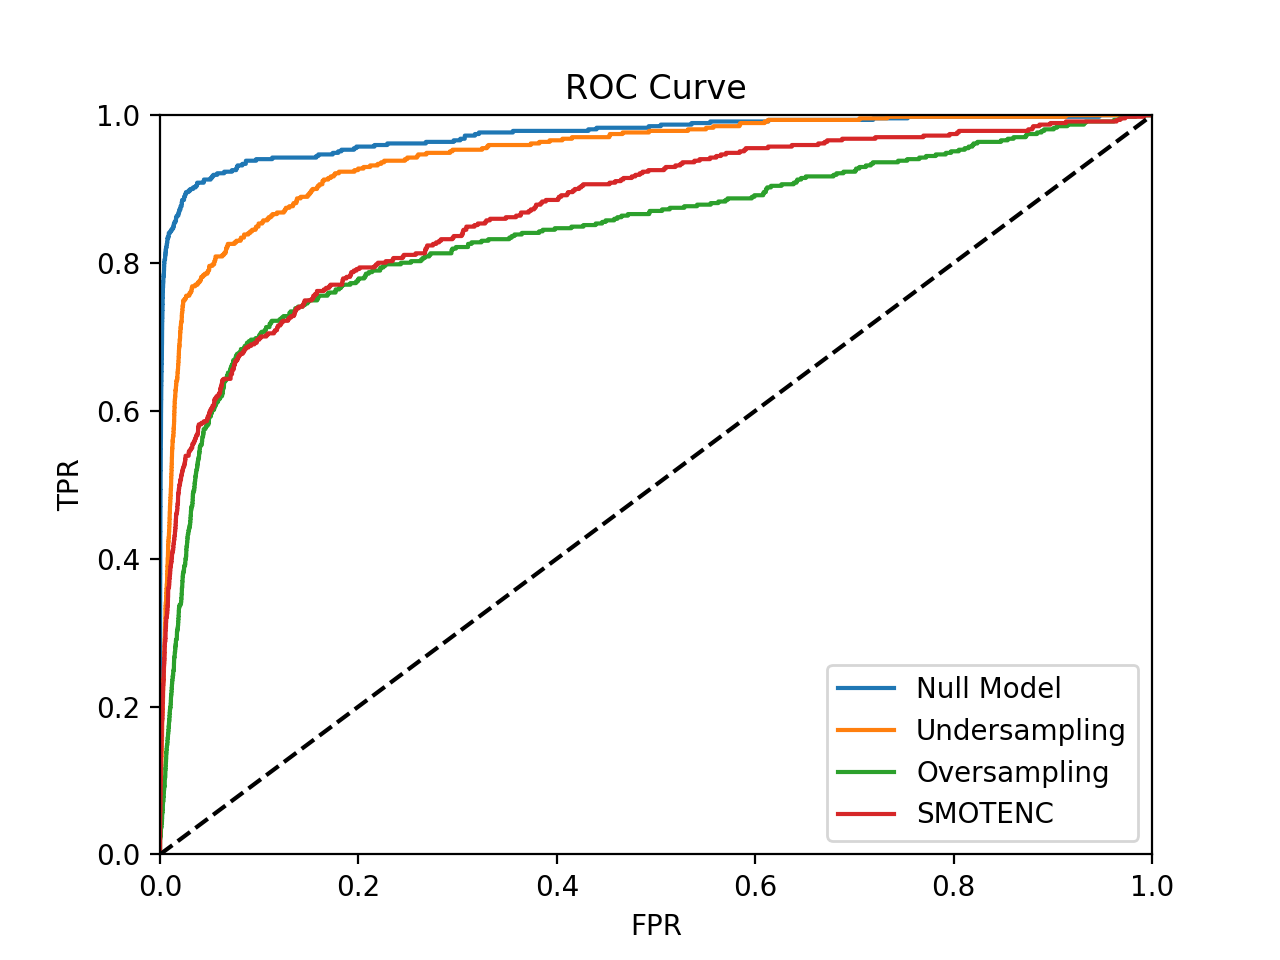

In [257]:
plt.plot(null_model_curves['ROC_AUC']['fpr'], null_model_curves['ROC_AUC']['tpr'], ls="solid", label="Null Model")
plt.plot(under_model_curves['ROC_AUC']['fpr'], under_model_curves['ROC_AUC']['tpr'], ls="solid", label="Undersampling")
plt.plot(over_model_curves['ROC_AUC']['fpr'], over_model_curves['ROC_AUC']['tpr'], ls="solid", label="Oversampling")
plt.plot(smote_model_curves['ROC_AUC']['fpr'], smote_model_curves['ROC_AUC']['tpr'], ls="solid", label="SMOTENC")
plt.plot([0, 1], [0, 1], c="black", ls="--")
plt.legend(loc='lower right')
plt.ylim((0, 1))
plt.xlim((0, 1))
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.title("ROC Curve")
plt.show()

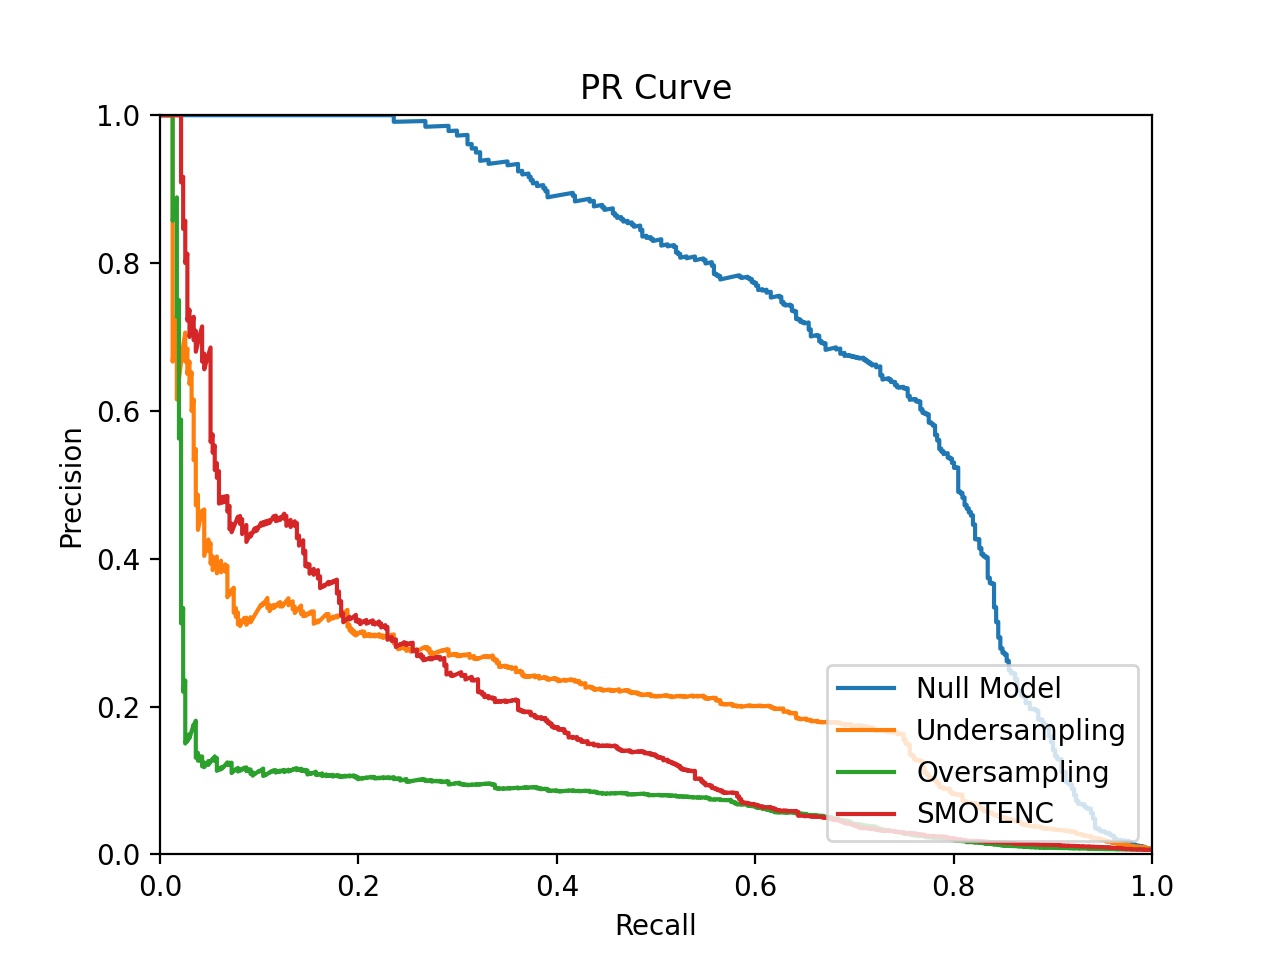

In [258]:
plt.plot(null_model_curves['PR']['recall'], null_model_curves['PR']['precision'], ls="solid", label="Null Model")
plt.plot(under_model_curves['PR']['recall'], under_model_curves['PR']['precision'], ls="solid", label="Undersampling")
plt.plot(over_model_curves['PR']['recall'], over_model_curves['PR']['precision'], ls="solid", label="Oversampling")
plt.plot(smote_model_curves['PR']['recall'], smote_model_curves['PR']['precision'], ls="solid", label="SMOTENC")
plt.legend(loc='lower right')
plt.ylim((0, 1))
plt.xlim((0, 1))
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("PR Curve")
plt.show()

In [259]:
overall_scores = pd.concat([
    null_model.scores(),
    under_model.scores(),
    over_model.scores(),
    smote_model.scores()
], axis=0).set_axis(['Null Model', 'Undersampling', 'Oversampling', 'SMOTENC'], axis=0)

print(overall_scores)

               accuracy  precision    recall        f1   roc_auc
Null Model     0.996491   0.764706  0.607219  0.676923  0.973694
Undersampling  0.868781   0.039095  0.876858  0.074853  0.946788
Oversampling   0.991388   0.121673  0.067941  0.087193  0.844070
SMOTENC        0.993920   0.483871  0.063694  0.112570  0.874220
